In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 8.70k/8.70k [00:00<00:00, 2.17MB/s]

Extracting files...


Path to dataset files: /Users/kirsten/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [2]:
import pandas as pd

# Load data
df = pd.read_csv('/Users/kirsten/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1/StudentsPerformance.csv')

In [3]:
# Explore dataset
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Explore values of Numeric Variables

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Check for other missing values.

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Explore values of Categorical Variables

num_vars = ['math score', 'reading score', 'writing score']
df_cat = df.drop(num_vars, axis = 1)
for col in list(df_cat):
  print("\n", df_cat[col].value_counts(dropna=False).to_string())


 gender
female    518
male      482

 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89

 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59

 lunch
standard        645
free/reduced    355

 test preparation course
none         642
completed    358


In [10]:
# Per Midterm Instructions: predict race/ethnicity of the student from the math, reading and writing scores.

# target variable = 'race/ethnicity'
# predictor variables = 'math score', 'reading score', 'writing score'

# drop other variables from df for purpose of this model

df_filt = df.drop(['gender', 'parental level of education', 'lunch', 'test preparation course'], axis = 1)
df_filt.shape

(1000, 4)

In [11]:
df_filt.head()

,race/ethnicity,math score,reading score,writing score
0,group B,72,72,74
1,group C,69,90,88
2,group B,90,95,93
3,group A,47,57,44
4,group C,76,78,75


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

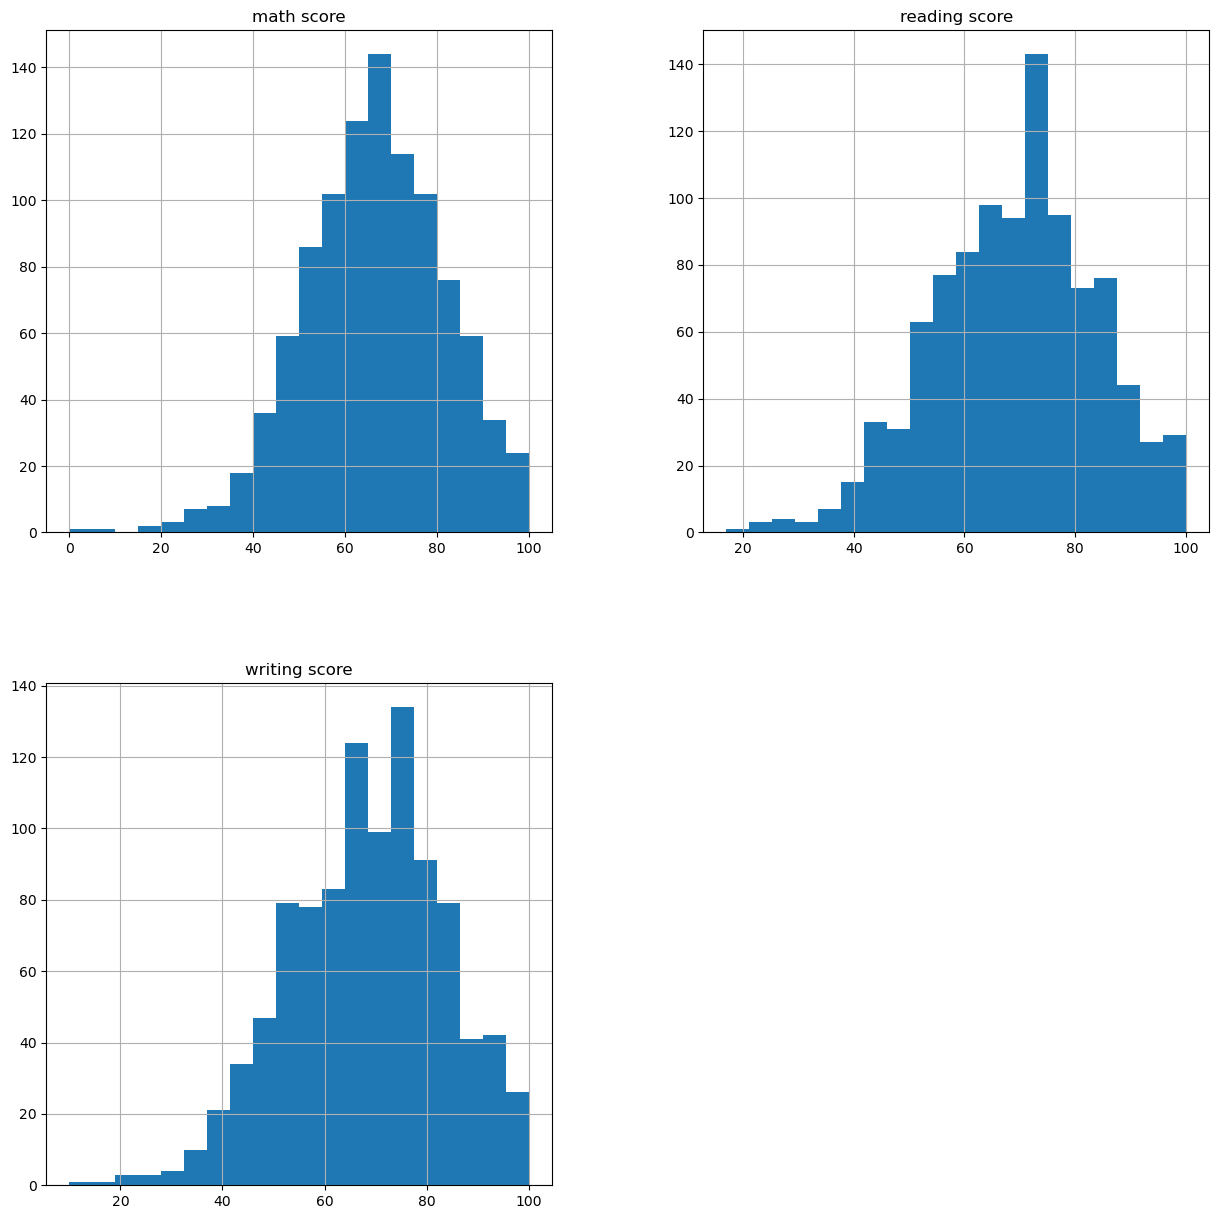

In [13]:
# histograms to show numeric variables distributions
df_filt.hist(bins=20, figsize=(15, 15))

In [14]:
# Split Dataset into Features and Target Sets

X = df_filt.drop(columns = ['race/ethnicity'])
y = df_filt['race/ethnicity'].values


# Split Dataset into Train/Test Splits stratifying according to target variable (to ensure similar levels of churn in training vs. testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 88, stratify=y)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (750, 3)
y_train.shape:  (750,)
X_test.shape:  (250, 3)
y_test.shape:  (250,)


In [15]:
# Build Machine Learning Model: Decision Tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Use GridSearch to find the best parameters in order to fine-tune the Decision Tree 

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model
best_dt_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.32799999999999996


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Define the model with the best parameters
best_params = {
    'criterion': 'entropy', 
    'max_depth': 3, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2
}

# Create the decision tree classifier with the best parameters
dt_model = DecisionTreeClassifier(**best_params)

# Fit the model to your data (X_train and y_train should be your feature matrix and labels)
dt_model.fit(X_train, y_train)

# Now you can make predictions or evaluate the model
y_pred = dt_model.predict(X_test)

# If you want to check the accuracy of the model
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.352


In [26]:
# Train a Random Forest Model to see if it has higher accuracy

from sklearn.ensemble import RandomForestClassifier

# Initialize the Model
rf = RandomForestClassifier(n_estimators=10, random_state=88)

# Train the Model
rf.fit(X_train, y_train)

# Use Model to Make Predictions on Test Set
y_pred = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Confusion Matrix:\n{rf_conf_matrix}")

Random Forest Accuracy: 0.292
Random Forest Confusion Matrix:
[[ 1  9  8  3  1]
 [ 2 13 14 14  5]
 [ 7 14 29 27  3]
 [ 3 10 24 23  5]
 [ 1  8 11  8  7]]


In [27]:
# Train a RBF SVM Model to see if it has higher accuracy

from sklearn.svm import SVC

# Initialize the Model
svmrbf = SVC(kernel='rbf', gamma='scale')

# Train the Model
svmrbf.fit(X_train, y_train)

# Use Model to Make Predictions on Test Set
y_pred = svmrbf.predict(X_test)

# Evaluate the model
rbf_accuracy = accuracy_score(y_test, y_pred)
rbf_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"RBF SVM Accuracy: {rbf_accuracy}")
print(f"RBF SVM Confusion Matrix:\n{rbf_conf_matrix}")

RBF SVM Accuracy: 0.364
RBF SVM Confusion Matrix:
[[ 0  0 19  3  0]
 [ 0  0 41  3  4]
 [ 0  0 71  7  2]
 [ 0  0 48 13  4]
 [ 0  0 19  9  7]]


In [28]:
# Train a Linear SVM Model to see if it has higher accuracy

from sklearn.svm import SVC

# Initialize the Model
svmlin = SVC(kernel='linear')

# Train the Model
svmlin.fit(X_train, y_train)

# Use Model to Make Predictions on Test Set
y_pred = svmlin.predict(X_test)

# Evaluate the model
lin_accuracy = accuracy_score(y_test, y_pred)
lin_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Linear SVM Accuracy: {lin_accuracy}")
print(f"Linear SVM Confusion Matrix:\n{lin_conf_matrix}")

Linear SVM Accuracy: 0.316
Linear SVM Confusion Matrix:
[[ 0  0 19  3  0]
 [ 0  0 40  8  0]
 [ 0  0 62 18  0]
 [ 0  0 48 17  0]
 [ 0  0 26  9  0]]


In [29]:
# Train a KNN Model to see if it has higher accuracy

from sklearn.neighbors import KNeighborsClassifier

# Initialize the Model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the Model
knn.fit(X_train, y_train)

# Use Model to Make Predictions on Test Set
y_pred = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN Confusion Matrix:\n{knn_conf_matrix}")

KNN Accuracy: 0.248
KNN Confusion Matrix:
[[ 2  4 11  5  0]
 [ 2 13 19  7  7]
 [ 5 22 31 20  2]
 [ 8  9 25 13 10]
 [ 2 10 13  7  3]]


In [30]:
# Compare all model accuracy levels

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"RBF SVM Accuracy: {rbf_accuracy}")
print(f"Linear SVM Accuracy: {lin_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")

Decision Tree Accuracy: 0.352
Random Forest Accuracy: 0.292
RBF SVM Accuracy: 0.364
Linear SVM Accuracy: 0.316
KNN Accuracy: 0.248


In [32]:
# Because RBF SVM has highest accuracy out of tested models, move forward with saving and deploying this model

# Save Model as a Pickle (.pkl) File

import joblib
joblib.dump(svmrbf, 'eth_by_stud_perform.pkl')

['eth_by_stud_perform.pkl']

In [34]:
from flask import Flask, render_template, request
import joblib
import numpy as np

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model (ensure the pickle file is in your project folder)
model = joblib.load("eth_by_stud_perform.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input values from the form
    var_1 = float(request.form['math score'])
    var_2 = float(request.form['reading score'])
    var_3 = float(request.form['writing score'])

    # Create an array of input data
    input_data = np.array([[var_1, var_2, var_3]])

    # Make a prediction using the model
    prediction = model.predict(input_data)

    # Map prediction result to human-readable text
    result = prediction[0]

    return render_template('index.html', prediction=result)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
